In [1]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,  random_state=0)

scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

svm = SVC()

svm.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)

print(f'Test score: {svm.score(X_test_scaled, y_test)}')

Test score: 0.972027972027972


In [2]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001,0.01,0.1,1,10,100]}
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
print(f'Best cross-validation accuracy: {grid.best_score_}')
print(f'Best set score: {grid.score(X_test_scaled, y_test)}')
print(f'Best parameters: {grid.best_params_}')

Best cross-validation accuracy: 0.9812311901504789
Best set score: 0.972027972027972
Best parameters: {'C': 1, 'gamma': 1}


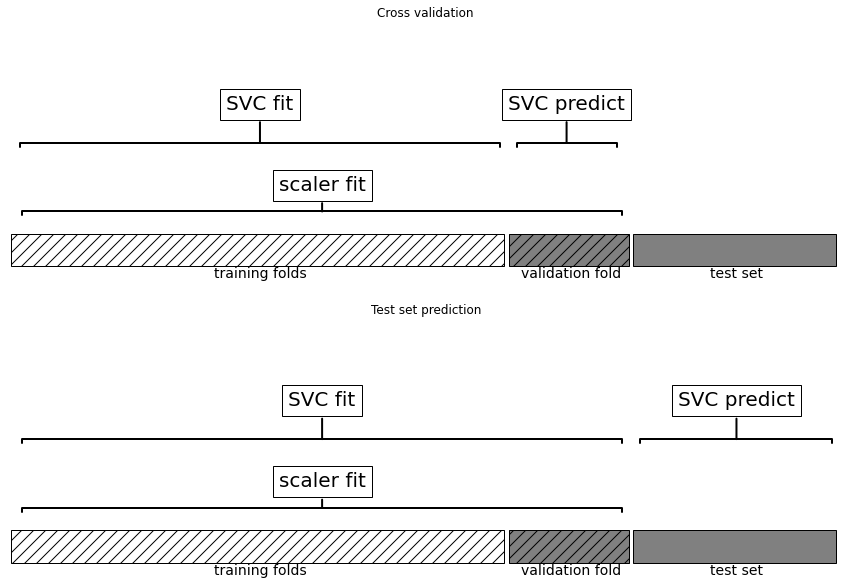

In [3]:
import mglearn
mglearn.plots.plot_improper_processing()

In [4]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', MinMaxScaler()), ('svm', SVC())])

In [5]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('svm', SVC())])

In [6]:
print(f'Test score: {pipe.score(X_test, y_test)}')

Test score: 0.972027972027972
